# Texto y anotaciones en coordenadas


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Languages
languages = pd.read_csv('Languages.csv')

In [12]:
languages

,CountryCode,Language,IsOfficial,Percentage
0,ABW,Dutch,T,5.3
1,ABW,English,F,9.5
2,ABW,Papiamento,F,76.7
3,ABW,Spanish,F,7.4
4,AFG,Balochi,F,0.9
...,...,...,...,...
979,ZMB,Tongan,F,11.0
980,ZWE,English,T,2.2
981,ZWE,Ndebele,F,16.2
982,ZWE,Nyanja,F,2.2


Se filtrará la información para obtener únicamente la información del idioma español en México y sus fronteras. 

In [13]:
mexico_borders = languages.loc[(languages['CountryCode'].isin(
    ['MEX','USA','BLZ','GTM'])) & (languages['Language'] == 'Spanish'),
    ['CountryCode','Percentage']]
mexico_borders.set_index('CountryCode',inplace=True)
mexico_borders

,Percentage
CountryCode,
BLZ,31.6
GTM,64.7
MEX,92.1
USA,7.5


Text(2, 92.1, '92.1%')

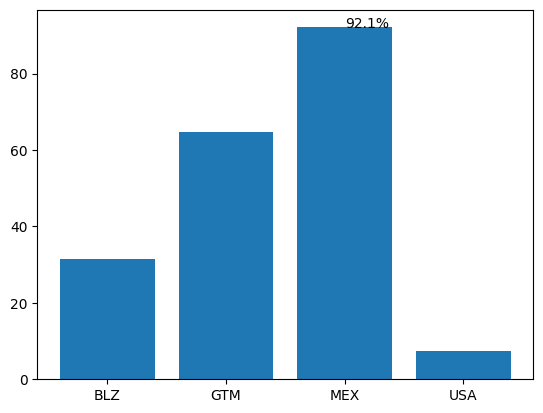

In [14]:
# Matplotlib
plt.bar(mexico_borders.index,'Percentage',data=mexico_borders)
plt.text(2,92.1,'92.1%')

Text(2, 92.1, '92.1%')

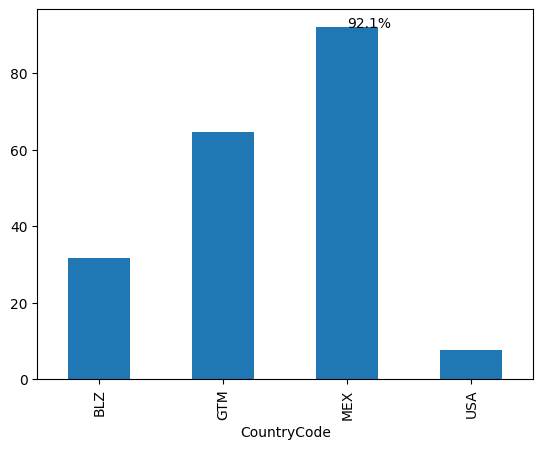

In [15]:
# Pandas
mexico_borders['Percentage'].plot.bar()
plt.text(2,92.1,'92.1%')

Text(2, 92.21, '92.1%')

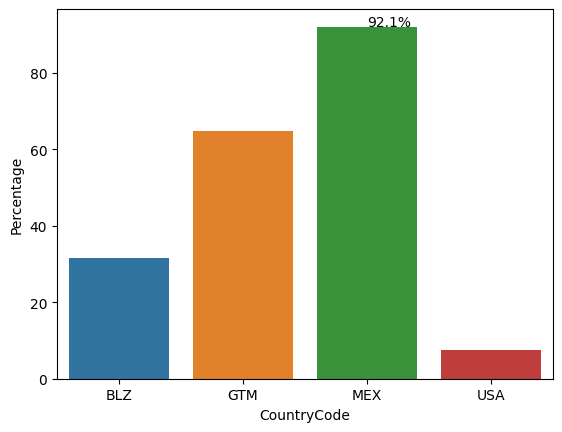

In [16]:
# Seaborn
sns.barplot(x=mexico_borders.index,y='Percentage',data=mexico_borders,hue='CountryCode')
plt.text(2,92.21,'92.1%')

En la función text se tiene lo siguiente:
`plt.text(2,92.1,'92.1%')`
Donde MEX está en la posición 2, la serie inicia en 0 para los gráficos de barras, y 92.1 en el eje vertical, que corresponde al porcentaje que se quiere representar. Pero si en lugar de indicar los valores fijados, la información se extrae del dataframe de la siguiente manera.

Text(MEX, 92.1, '92.1%')

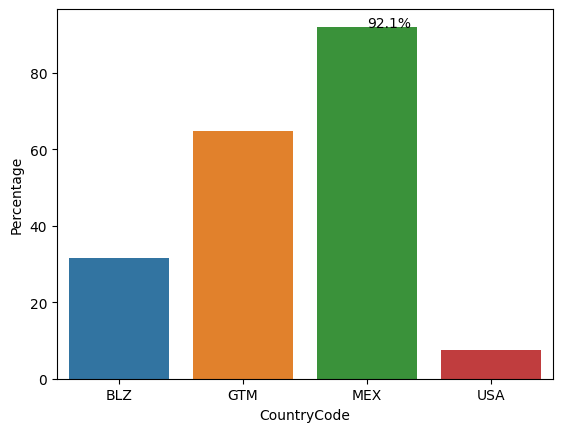

In [17]:
value = mexico_borders.loc['MEX','Percentage']
# Seaborn
sns.barplot(x=mexico_borders.index,y='Percentage',data=mexico_borders,hue='CountryCode')
plt.text('MEX',value,str(value)+'%')

¿Qué pasaría si no se conoce directamente el índice a buscar y lo tienes que extraer de una condición?

In [18]:
value = mexico_borders.loc[mexico_borders['Percentage'] == mexico_borders['Percentage'].max(),
                           'Percentage']
value

CountryCode
MEX    92.1
Name: Percentage, dtype: float64

Como se ve, `value` es una serie, y para tener acceso al 92.1 es necesario utilizar la función **to_list()** y extraer el primer valor de la misma con el índice 0.

In [19]:
value = mexico_borders.loc[mexico_borders['Percentage'] == mexico_borders['Percentage'].max(),
                           'Percentage']
value = value.to_list()
value

[92.1]

Se puede indicar la ubicación seleccionando un sistema de coordenadas diferente a través del parámetro **transform**. 

Text(220, 150, '92.1%')

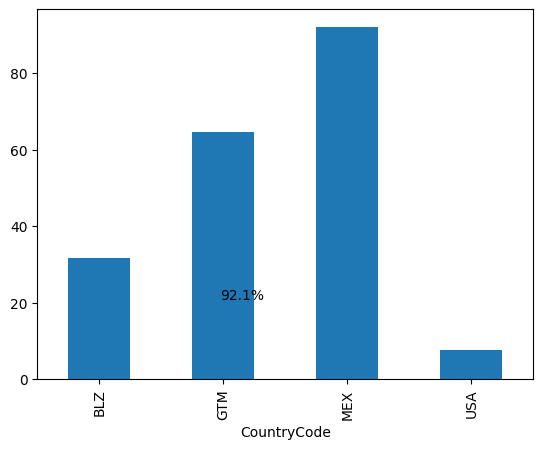

In [20]:
# Un pixel específico
mexico_borders['Percentage'].plot.bar()
plt.text(220,150,'92.1%',transform=None)

Text(0.58, 0.5, '92.1%')

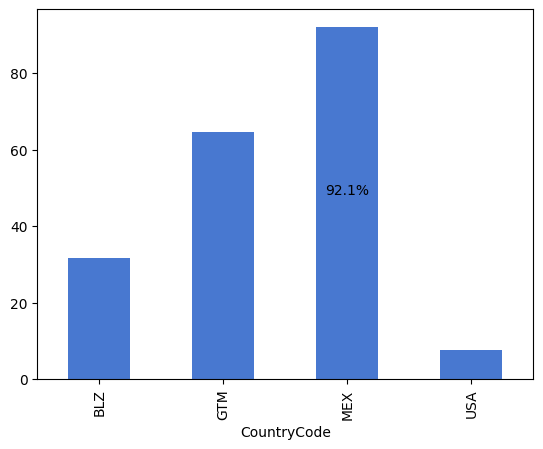

In [56]:
# Relación a los ejes
ax = mexico_borders['Percentage'].plot.bar()
plt.text(0.58,0.5,'92.1%',transform=ax.transAxes)

Text(0.58, 0.5, '92.1%')

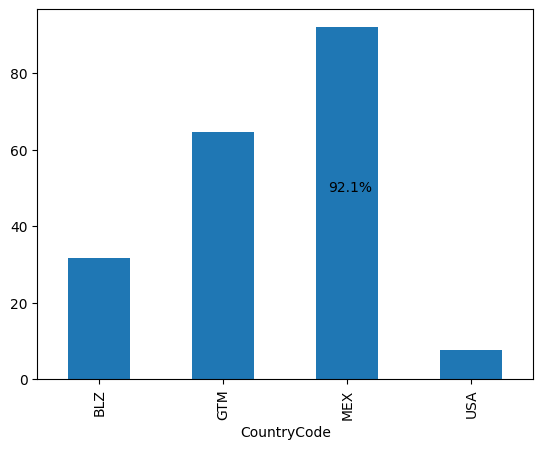

In [22]:
# Relación a la figura
fig , ax  = plt.subplots()
mexico_borders['Percentage'].plot.bar(ax=ax)
plt.text(0.58,0.5,'92.1%',transform=fig.transFigure)

Cuando se usan los ejes o la figura como referencia para las coordenadas, se debe generar el objeto de gráfica **ax** o el contenedor **fig**, respectivamente, y se considera que (0,0) es el límite inferior izquierdo y (1,1) es el límite superior derecho.
Hay muchas propiedades del texto que se podrán personalizar. 

Text(2, 92.1, '92.1%')

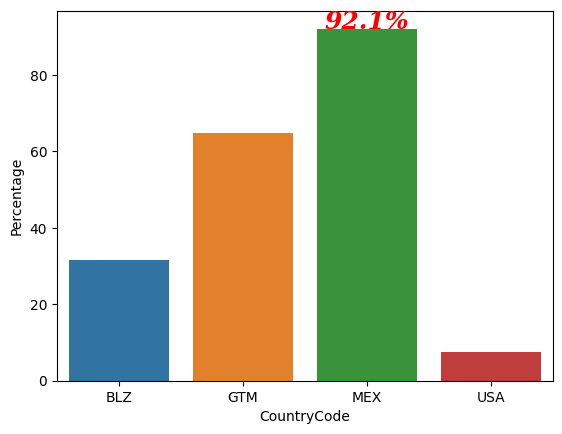

In [23]:
# Seaborn
sns.barplot(x=mexico_borders.index,y='Percentage',data=mexico_borders,hue='CountryCode')
plt.text(2,92.1,'92.1%',family='serif',fontsize=18,fontweight='bold',
         style='italic',color='red',horizontalalignment='center')

También se pueden pasar las propiedades como un diccionario.

Text(2, 92.1, '92.1%')

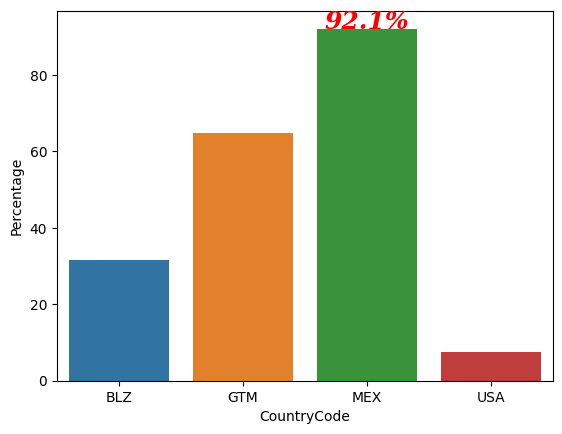

In [24]:
props_font = {'family':'serif',
              'size':18,
              'weight':'bold',
              'style':'italic',
              'color':'red',
              'horizontalalignment':'center'}
sns.barplot(x=mexico_borders.index,y='Percentage',data=mexico_borders,hue='CountryCode')
plt.text(2,92.1,'92.1%',fontdict=props_font)

El texto también se puede resaltarlo a través de un objeto *bbox*, que posee entre sus propiedades el nivel de transparencia (alpha) y el espacio entre el contenido y el borde del elemento (pad):


Text(2, 92.1, '92.1%')

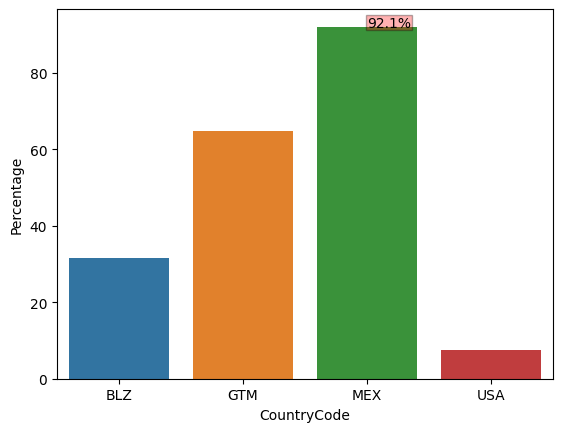

In [25]:
sns.barplot(x=mexico_borders.index,y='Percentage',data=mexico_borders,hue='CountryCode')
plt.text(2,92.1,'92.1%',bbox=dict(facecolor='red',alpha=0.3,pad=0.5))

Se puede especificar el tipo de contenedor e indicar las propiedades dreando previamente el diccionario.

Text(2, 92.1, '92.1%')

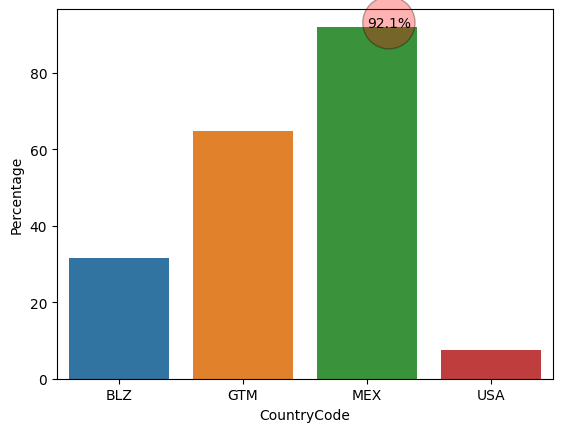

In [26]:
props_box = {'boxstyle':'circle',
             'facecolor':'red',
             'alpha':0.3}
sns.barplot(x=mexico_borders.index,y='Percentage',data=mexico_borders,hue='CountryCode')
plt.text(2,92.1,'92.1%',bbox=props_box)

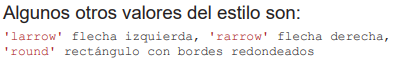

Para incluir los valores de todos los países, es neceario que hagas un recorrido por las filas del dataframe con un ciclo y extraer el porcentaje de hablantes

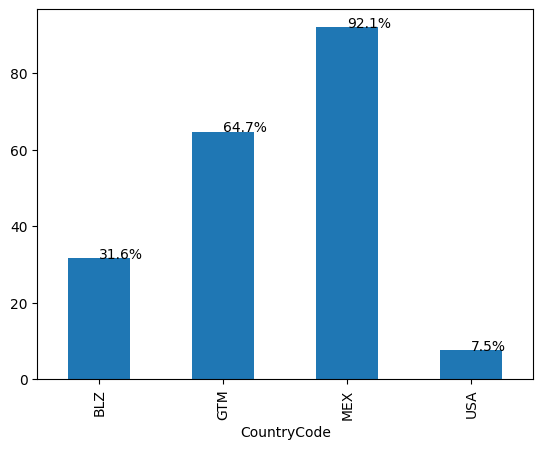

In [27]:
mexico_borders['Percentage'].plot.bar()
for i in range(mexico_borders.shape[0]):
    plt.text(i,mexico_borders.iloc[i,0],str(mexico_borders.iloc[i,0])+'%')

Además de texto, se pueden instertar líneas horizontales y/o verticales para indicar ciertos valores relevantes o de referencia, utilizando las funciones `axhline()` y `axvlines()`. 

Text(-0.4, 66.05, '66.05%')

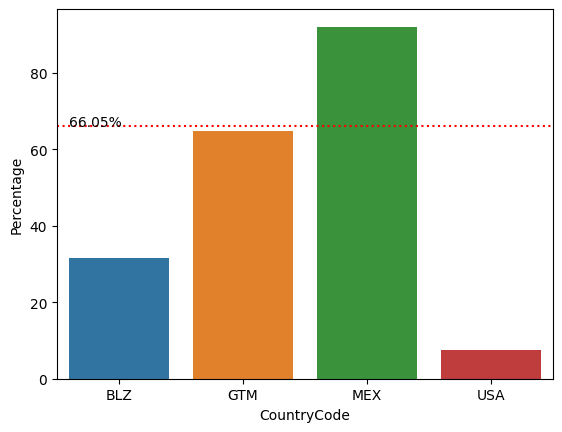

In [28]:
spanish_mean = (languages.loc[languages['Language']== 'Spanish',
                              'Percentage']).mean()
sns.barplot(x=mexico_borders.index,y='Percentage',data=mexico_borders,hue='CountryCode')
plt.axhline(y=spanish_mean,color='red',linestyle=':')
plt.text(-0.4,spanish_mean,str(f'{spanish_mean:.2f}') + '%')


Habrá casos en los que además de ubbicar un texto en una posición determinar del gráfico, necesites puntualizar en alguna característica. Para ello, se usa la función **annotate()**, que además de considerar la ubicación del texto, recibe la ubicación de la anotación. Ambas ubicaciones deben ser enviadas como tuplas `(x,y)`.

In [29]:
mexico = languages.loc[languages['CountryCode'] == 'MEX',
                       ['Language','Percentage']]
mexico.set_index('Language',inplace=True)
mexico

,Percentage
Language,
Mixtec,0.6
Náhuatl,1.8
Otomí,0.4
Spanish,92.1
Yucatec,1.1
Zapotec,0.6


In [30]:
mexico.loc['Others'] = [100-mexico['Percentage'].sum()]
mexico

,Percentage
Language,
Mixtec,0.6
Náhuatl,1.8
Otomí,0.4
Spanish,92.1
Yucatec,1.1
Zapotec,0.6
Others,3.4


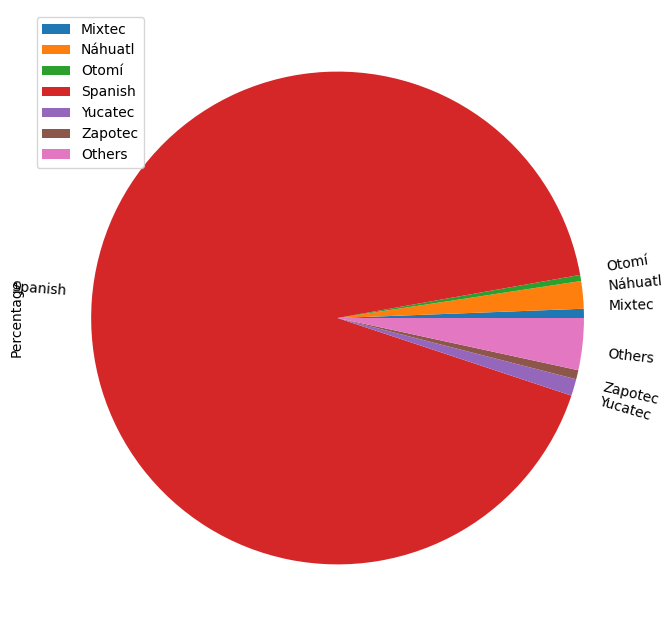

In [31]:
mexico.plot.pie(y='Percentage',labels=mexico.index,rotatelabels=True,
                figsize=(8,8))
sns.set_palette('muted')

Para tener mayor detalle, se dejan únicamente las lenguas no oficiales:

In [32]:
mexico_unofficial = mexico.drop(mexico.loc[mexico.index=='Spanish'].index)
mexico_unofficial   

,Percentage
Language,
Mixtec,0.6
Náhuatl,1.8
Otomí,0.4
Yucatec,1.1
Zapotec,0.6
Others,3.4


<Axes: ylabel='Percentage'>

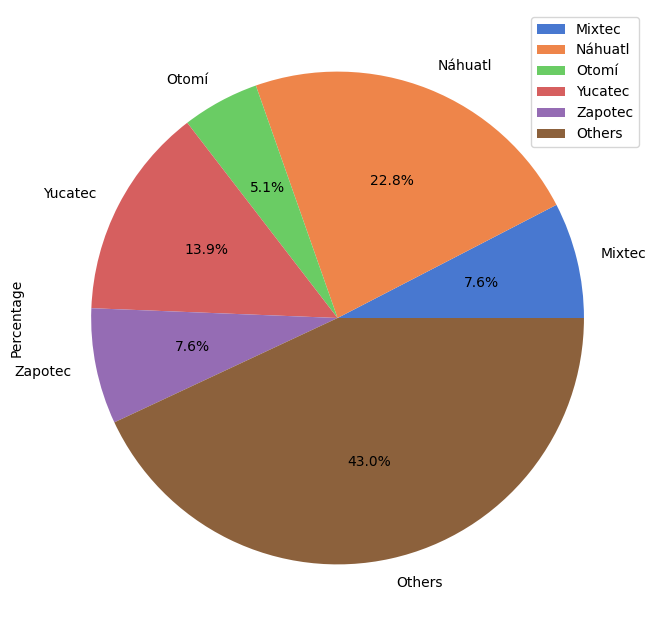

In [33]:
mexico_unofficial.plot.pie(y='Percentage',labels=mexico_unofficial.index,
                           autopct='%1.1f%%',figsize=(8,8))

En un gráfico circular, las coordenadas (0,0) se  encuentra al centro.

Text(1, 1, '(0,0)')

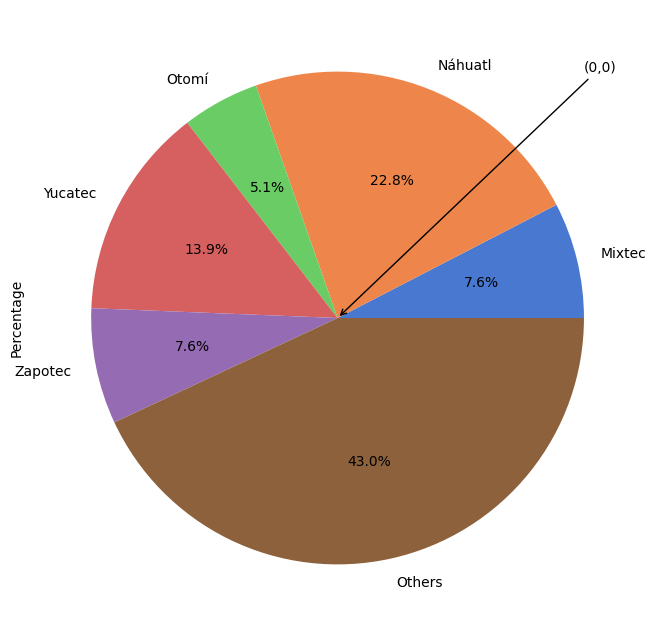

In [34]:
mexico_unofficial.plot.pie(y='Percentage',labels=mexico_unofficial.index,
                           autopct='%1.1f%%',figsize=(8,8),legend=False)
plt.annotate('(0,0)',xy=(0,0),xytext=(1,1),arrowprops=dict(arrowstyle='->'))

Hay muchos estilos de flecha:
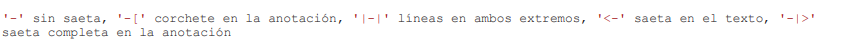

También se puede modificar el estilo y color de la línea de conexión.

Text(1, 1, '(0,0)')

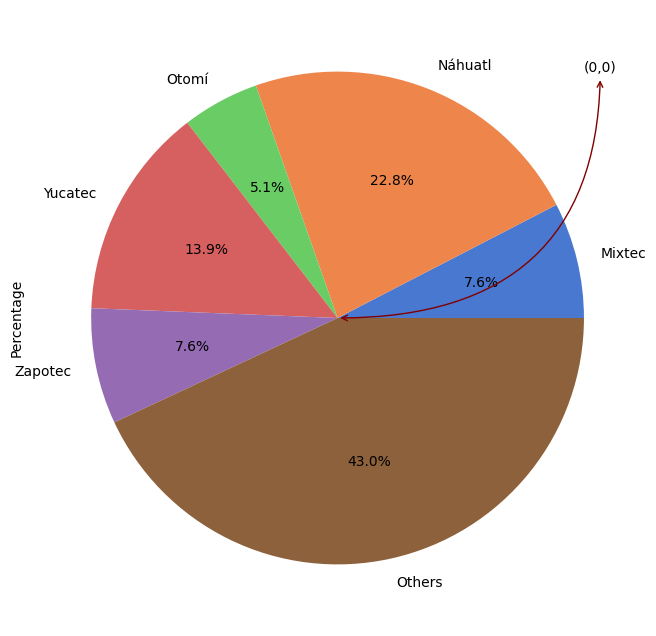

In [35]:
mexico_unofficial.plot.pie(y='Percentage',labels=mexico_unofficial.index,
                           autopct='%1.1f%%',figsize=(8,8),legend=False)
plt.annotate('(0,0)',xy=(0,0),xytext=(1,1),
             arrowprops=dict(arrowstyle='<->',connectionstyle='angle3',
                             color = 'maroon'))

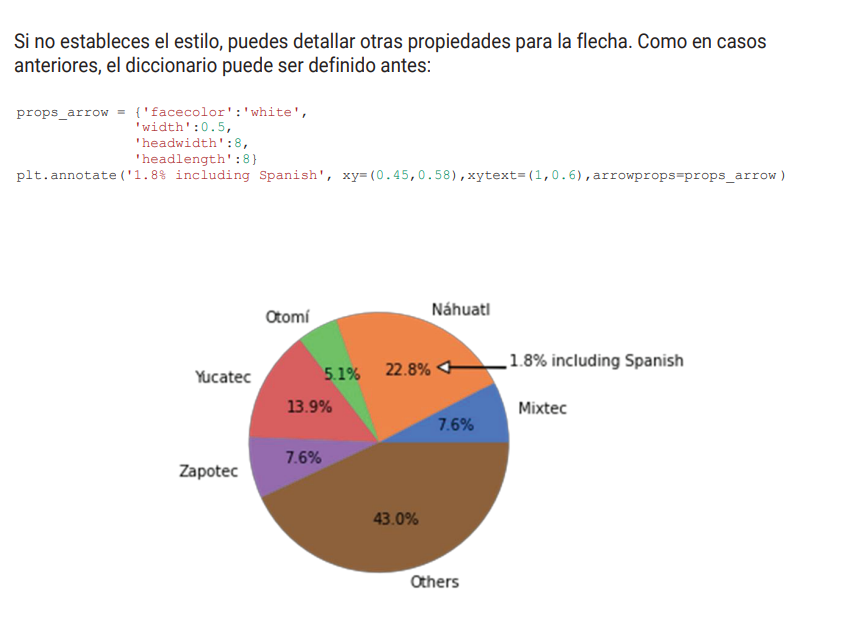

## Trazado de Tablas

La función `table()` de Matplotlib recibe como oarámetros los textos a colocar en las celdas de la tabal y se pueden emplear en cualquier tipo de gráfico, independiemente de la plataforma.

In [36]:
some_languages = languages.loc[languages['Language'].isin(
    ['Spanish','English','Chinese','French','Russian','Italian',
     'German'])]
some_languages

,CountryCode,Language,IsOfficial,Percentage
1,ABW,English,F,9.5
3,ABW,Spanish,F,7.4
18,AIA,English,T,0.0
23,AND,French,F,6.2
25,AND,Spanish,F,44.6
...,...,...,...,...
948,VUT,English,T,28.3
949,VUT,French,T,14.2
952,WSM,English,T,0.6
964,ZAF,English,T,8.5


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'English'),
  Text(1, 0, 'Spanish'),
  Text(2, 0, 'French'),
  Text(3, 0, 'Italian'),
  Text(4, 0, 'German'),
  Text(5, 0, 'Russian'),
  Text(6, 0, 'Chinese')])

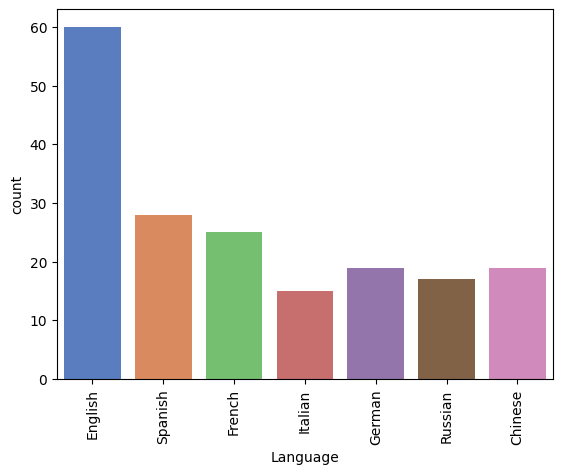

In [37]:
sns.countplot(x='Language',data=some_languages,hue='Language')
plt.xticks(rotation=90)

Si se quisiera incluir los valores numéricos en el gráfico se podría utilizar la función `text()` o una tabla de datos en el eje horitzontal. Pero antes, es necesario generar el df con los conteos por idioma, se puede utilizar `value_counts()` o `groupby()`.

In [38]:
# Value counts
counts_1 = pd.DataFrame(some_languages['Language'].value_counts())
counts_1

,count
Language,
English,60
Spanish,28
French,25
German,19
Chinese,19
Russian,17
Italian,15


In [39]:
# groupby
counts_2 = some_languages.groupby(['Language']).count()[['CountryCode']]
counts_2

,CountryCode
Language,
Chinese,19
English,60
French,25
German,19
Italian,15
Russian,17
Spanish,28


In [40]:
counts_1.index.name = 'Language'
counts_1.columns = ['Counts']
counts_1_T = counts_1.T
counts_1_T

Language,English,Spanish,French,German,Chinese,Russian,Italian
Counts,60,28,25,19,19,17,15


([], [])

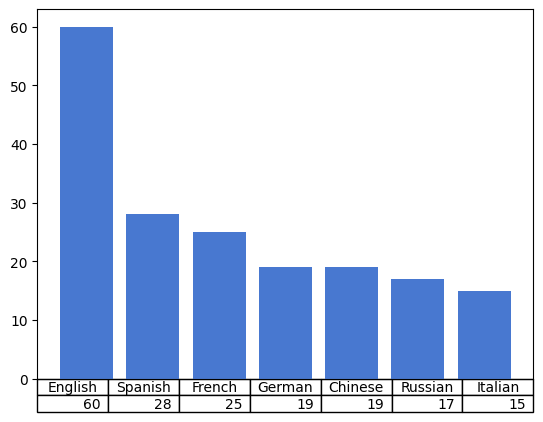

In [41]:
plt.bar(counts_1.index,'Counts',data=counts_1)
plt.table(cellText=counts_1_T.values,colLabels=counts_1_T.columns)
plt.xticks([])

<Axes: >

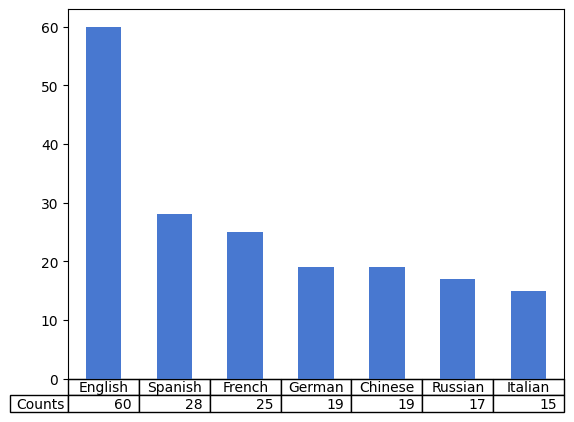

In [42]:
# Pandas
counts_1.plot(kind='bar',table=True,xticks=[],xlabel='',legend='')

Text(0.5, 0, '')

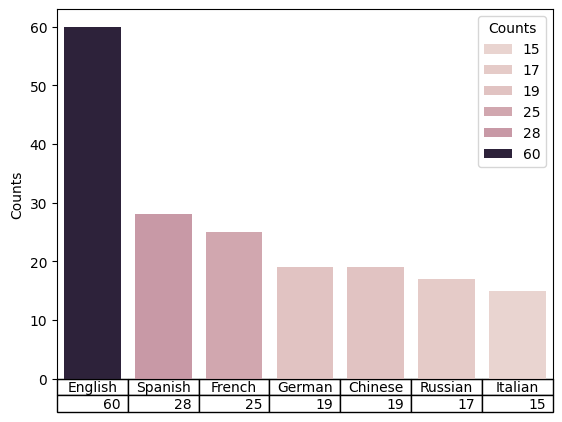

In [43]:
# Seaborn
sns.barplot(x=counts_1.index,y='Counts',data=counts_1,hue='Counts')
plt.table(cellText=counts_1_T.values,colLabels=counts_1_T.columns)
plt.xticks([])
plt.xlabel('')

- En Matplotlib y Seaborn se usa `counts_T` para construir la tabla y se pasa una lista vacía a la función `xticks()` para omitir las marcas del eje **x**. 
- La función `plot()` de Pandas posee el parámetro **table** para incluir la tabla de datos directamente.
- En Seaborn ya no es necesario ocupar `countplot()` ya que se tiene el dataframe *counts*.

Si se quieren incluir encabezados para registros o filas, se utilzia la propiedad **rowLabels**. 

Text(0.5, 0, '')

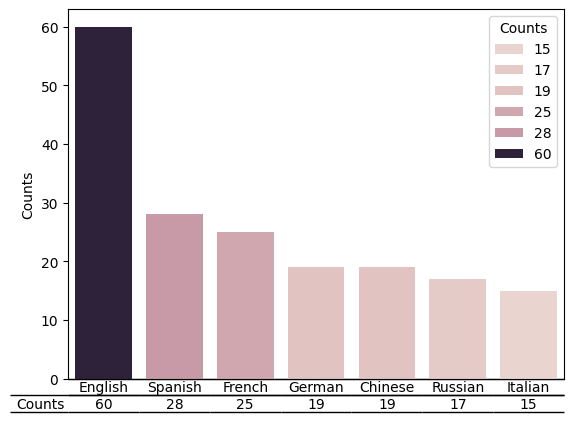

In [44]:
sns.barplot(x=counts_1.index,y='Counts',data=counts_1,hue='Counts')
plt.table(cellText=counts_1_T.values,colLabels=counts_1_T.columns,
          rowLabels=counts_1_T.index,cellLoc='center',edges='horizontal')
plt.xticks([])
plt.xlabel('')

También se puede especificar la alineación de las celdas con *cellLoc* y se podría hacer lo mismo con encabezados de filas y columnas, utilizando *rowLoc* y *colLoc*, respectivamente.

El parámetro *edges* permite indicar qué líneas de la tabla incluir.
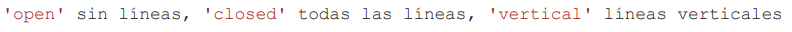

Cuando la tabla posee todas las líneas, *closed* por defecto, es posible colorear las celdas con los encabezados, a través de los parámetros *rowColours* y *colColours*. 

Text(0.5, 0, '')

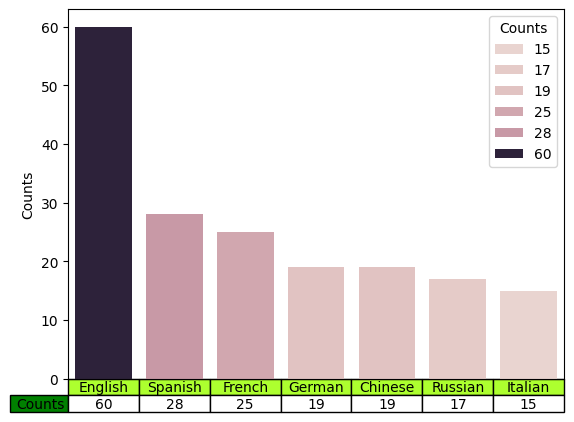

In [45]:
sns.barplot(x=counts_1.index,y='Counts',data=counts_1,hue='Counts')
plt.table(cellText=counts_1_T.values,colLabels=counts_1_T.columns,
          rowLabels=counts_1_T.index,cellLoc='center',rowColours=['green'],
          colColours=['greenyellow']*7)
plt.xticks([])
plt.xlabel('')

Se ha indica el mismo color para todas las columnas, indicado por el 7 en *colColours*, pero se podría asignar un color particular a cada una.

Para cambiar el tamaño de la letra, se debe hacer con las propiedades del objeto tabla creado con la función `table()` e identificando en el código como *t*:


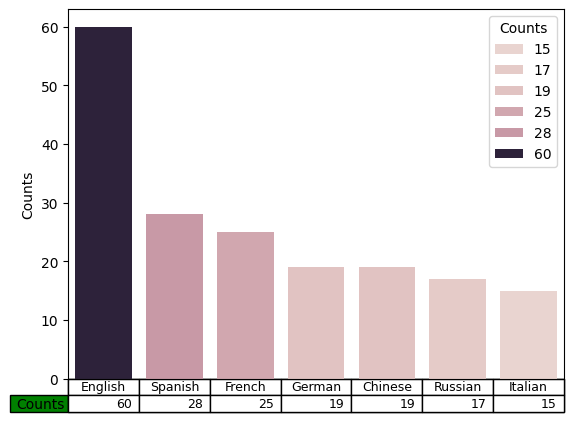

In [46]:
sns.barplot(x=counts_1.index,y='Counts',data=counts_1,hue='Counts')
plt.table(cellText=counts_1_T.values,colLabels=counts_1_T.columns,
          rowLabels=counts_1_T.index,cellLoc='center',rowColours=['green'],
          colColours=['greenyellow']*7)
plt.xticks([])
plt.xlabel('')
t = plt.table(cellText=counts_1_T.values,colLabels=counts_1_T.columns)
t.auto_set_font_size(False)
t.set_fontsize(9)

También se puede indexar directamente el objeto tabla para acceder a celdas individuales como en las matrices `cell = table [row,col]`


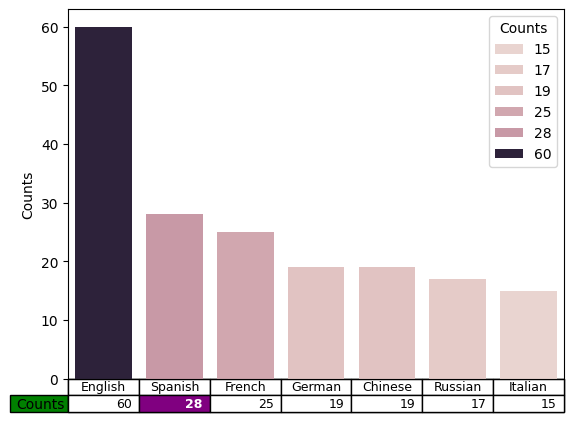

In [47]:
sns.barplot(x=counts_1.index,y='Counts',data=counts_1,hue='Counts')
plt.table(cellText=counts_1_T.values,colLabels=counts_1_T.columns,
          rowLabels=counts_1_T.index,cellLoc='center',rowColours=['green'],
          colColours=['greenyellow']*7)
plt.xticks([])
plt.xlabel('')
t = plt.table(cellText=counts_1_T.values,colLabels=counts_1_T.columns)
t.auto_set_font_size(False)
t.set_fontsize(9)
cell = t[1,1]
cell.set_text_props(weight='bold',color='white')
cell.set_facecolor('purple')

Para dar formato a varias celdas se tiene que hacer un recorrido por la tabla, usando un ciclo y ocupando la función `get_celld()` que devuelve un diccionario de celdas con el mapeo de la tabla (fila,columna) a celdas.

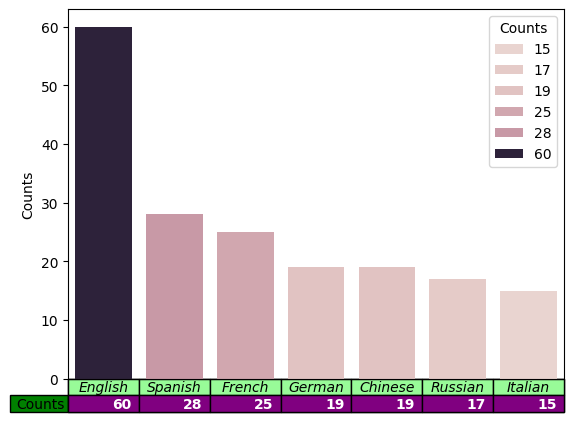

In [48]:
sns.barplot(x=counts_1.index,y='Counts',data=counts_1,hue='Counts')
plt.table(cellText=counts_1_T.values,colLabels=counts_1_T.columns,
          rowLabels=counts_1_T.index,cellLoc='center',rowColours=['green'],
          colColours=['greenyellow']*7)
plt.xticks([])
plt.xlabel('')
t = plt.table(cellText=counts_1_T.values,colLabels=counts_1_T.columns)
for (row,col), cell in t.get_celld().items():
    if (row == 0):
        cell.set_text_props(weight='light',style='italic')
        cell.set_facecolor('palegreen')
    else:
        cell.set_text_props(weight='bold',color='white')
        cell.set_facecolor('purple')

El cambio de color también es conveniente cuando se están representado varias series de datos, porque puede ocuparse en sustitución de la leyenda.

In [49]:
counts_isofficial = some_languages.groupby(['IsOfficial','Language']).count()[['CountryCode']]
counts_isofficial.columns = ['Count']
counts_isofficial

Count
IsOfficial Language       
F          Chinese      17
           English      16
           French        7
           German       13
           Italian      11
           Russian      14
           Spanish       8
T          Chinese       2
           English      44
           French       18
           German        6
           Italian       4
           Russian       3
           Spanish      20

Se acomoda la información de tal forma que los contetos queden en columnas independientes haciendo diferenciación por el vaor de la columna `IsOfficial`.

In [50]:
counts_isofficial = counts_isofficial.iloc[:7,:].merge(
    counts_isofficial.iloc[7:,:],on='Language',
    suffixes=('_F','_T'))[['Count_F','Count_T']]
counts_isofficial.columns = ['NonOfficial','Official']
counts_isofficial

,NonOfficial,Official
Language,,
Chinese,17,2
English,16,44
French,7,18
German,13,6
Italian,11,4
Russian,14,3
Spanish,8,20


<Axes: >

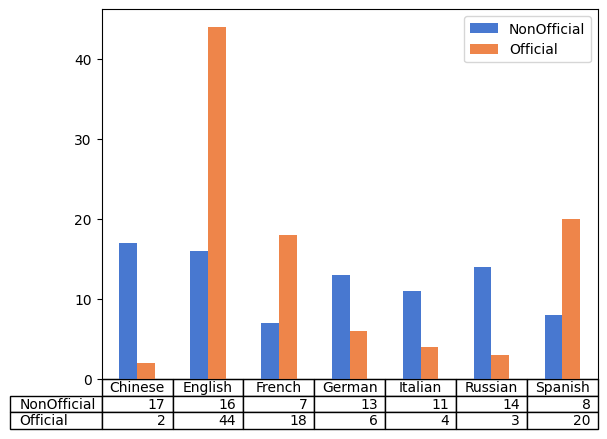

In [51]:
counts_isofficial.plot.bar(table=True,xticks=[],xlabel='')

Para indicar los colores en la tabla, es necesario usar la función `table()` de Matplotlib porque `plot()` de Pandas no permite la personalización,. 

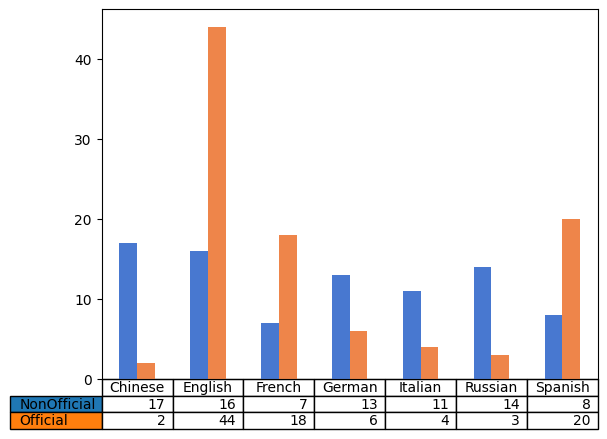

In [52]:
counts_isofficial.plot.bar(xticks=[],xlabel='',legend='')
counts_isofficial_T = counts_isofficial.T
plt.table(cellText = counts_isofficial_T.values, 
          colLabels= counts_isofficial_T.columns,
          rowLabels=counts_isofficial_T.index,
          rowColours=['tab:blue','tab:orange'])

Para utilizar los encabezados de columna como marcas del eje, la posición de la tabla puede cambiar a través del parámetro **loc**.

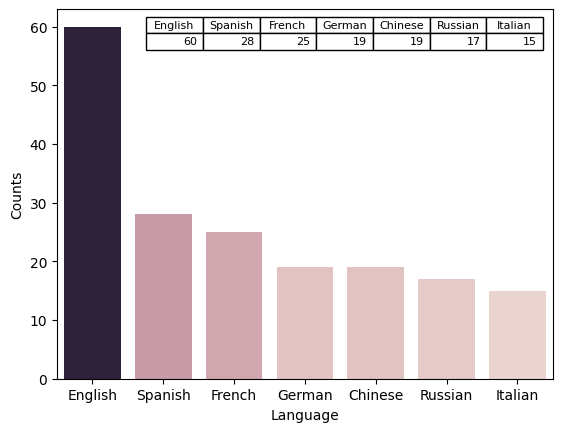

In [53]:
sns.barplot(x=counts_1.index,y='Counts',data=counts_1,hue='Counts',
            legend=False)
t = plt.table(cellText=counts_1_T.values,colLabels=counts_1_T.columns,
              loc = 'upper right')
t.scale(0.8,1)


Se escala la tabla con la función `scale(xscale,yscale)`. Para el ancho se usa un factor de 0.8 que la reduce horizontalmente. 